In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = sns.load_dataset('iris')
df = data[['sepal_length', 'petal_length', 'species']]
df

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
145,6.7,5.2,virginica
146,6.3,5.0,virginica
147,6.5,5.2,virginica
148,6.2,5.4,virginica


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df

C:\Users\acer\AppData\Local\Temp\ipykernel_9232\4219628301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = encoder.fit_transform(df['species'])


,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [4]:
df_train = df.iloc[:60,:].sample(10) #training data
df_val = df.iloc[60:80,:].sample(5) # testing 
df_test = df.iloc[80:, :].sample(5) # predicating

In [5]:
X_test = df_val.iloc[:, :-1]
y_test = df_val.iloc[:,-1]


In [6]:
df_train.shape

(10, 3)

In [7]:
# Data for tree 1
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,:-1]
y = df_bag.iloc[:,-1]
df_test

,sepal_length,petal_length,species
119,6.0,5.0,2
113,5.7,5.0,2
133,6.3,5.1,2
126,6.2,4.8,2
115,6.4,5.3,2


In [8]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions


In [9]:
def evalute(clf, X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X, y, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))

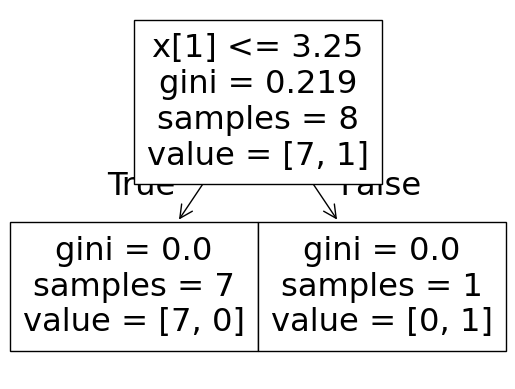

Accuracy Score:  1.0


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 0, 0])

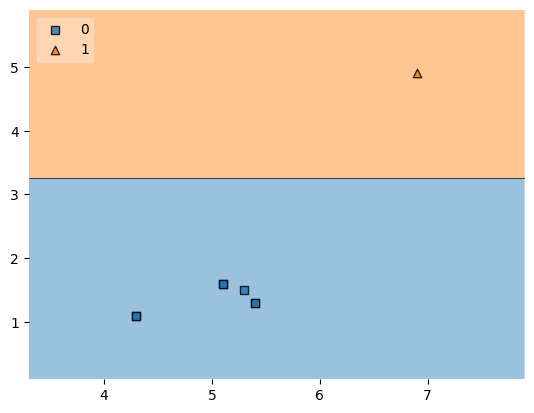

In [10]:
# data for tree 1
df_bag1 = df_train.sample(8, replace=True)
X = df_bag1.iloc[:,:-1].values
y = df_bag1.iloc[:,-1].values

dt1 = DecisionTreeClassifier()
evalute(dt1, X,y)
y

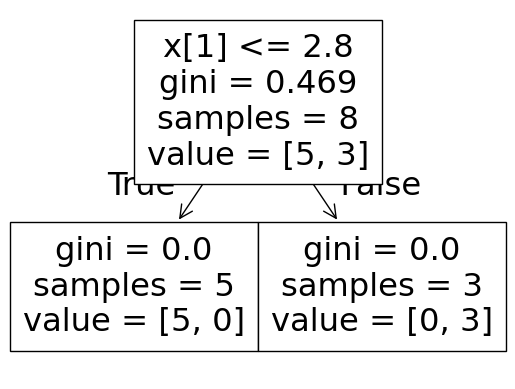

Accuracy Score:  1.0


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


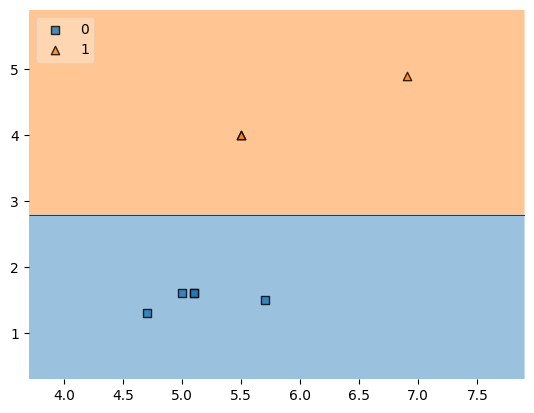

In [11]:
df_bag2 = df_train.sample(8, replace=True)
X = df_bag2.iloc[:, :-1].values
y = df_bag2.iloc[:,-1].values

dt2 = DecisionTreeClassifier()
evalute(dt2, X,y)

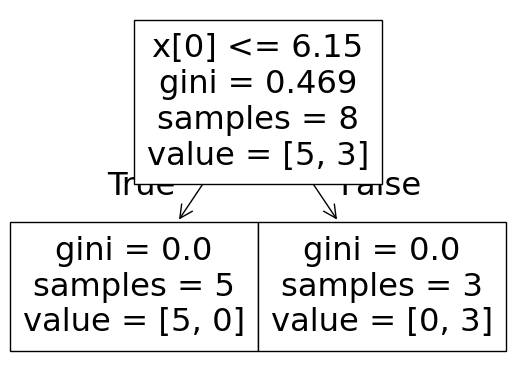

Accuracy Score:  0.0


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


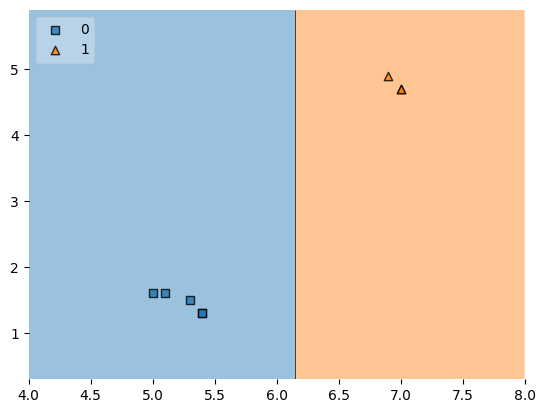

In [12]:
# data for tree 3
df_bag3 = df_train.sample(8, replace=True)
X = df_bag3.iloc[:,:-1].values
y = df_bag3.iloc[:,-1].values

dt3 = DecisionTreeClassifier()
evalute(dt3, X,y)

In [13]:
df_test.sample(5)

,sepal_length,petal_length,species
113,5.7,5.0,2
126,6.2,4.8,2
119,6.0,5.0,2
133,6.3,5.1,2
115,6.4,5.3,2


In [14]:
print('Predicator: ', dt1.predict([[5.1,3.0]]))
print('Predicator: ', dt2.predict([[6.9,5.7]]))
print('Predicator: ', dt2.predict([[6.9,5.7]]))

Predicator:  [0]
Predicator:  [1]
Predicator:  [1]


# Code from campusX

In [15]:
d = sns.load_dataset('iris')
d = d.iloc[:,1:]
d.shape


(150, 4)

In [16]:
d['species'] = encoder.fit_transform(d['species'])
d = d[d['species']!=0][['sepal_width', 'petal_length', 'species']]
d.head(5)

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [17]:
d = d.sample(100)
d_train = d.iloc[:60,:].sample(10)
d_val = d.iloc[60:80,:].sample(5)
d_test = d.iloc[80:,:].sample(5)


In [31]:
d_train

,sepal_width,petal_length,species
75,3.0,4.4,1
125,3.2,6.0,2
72,2.5,4.9,1
58,2.9,4.6,1
76,2.8,4.8,1
82,2.7,3.9,1
94,2.7,4.2,1
100,3.3,6.0,2
130,2.8,6.1,2
52,3.1,4.9,1


In [32]:
d_val

,sepal_width,petal_length,species
136,3.4,5.6,2
91,3.0,4.6,1
64,2.9,3.6,1
119,2.2,5.0,2
70,3.2,4.8,1


In [33]:
d_test

,sepal_width,petal_length,species
86,3.1,4.7,1
109,3.6,6.1,2
63,2.9,4.7,1
97,2.9,4.3,1
123,2.7,4.9,2


In [35]:
X_test = d_val.iloc[:,0:2].values
y_test = d_val.iloc[:,-1].values

In [36]:
y_test

array([2, 1, 1, 2, 1])

### Case 1: Bagging

In [50]:
# data for tree 1
d_bag1 = d_train.sample(8, replace=True)

X = d_bag.iloc[:,0:2]
y = d_bag.iloc[:,-1]

d_bag1

,sepal_width,petal_length,species
82,2.7,3.9,1
52,3.1,4.9,1
125,3.2,6.0,2
130,2.8,6.1,2
130,2.8,6.1,2
72,2.5,4.9,1
100,3.3,6.0,2
100,3.3,6.0,2


Accuracy score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


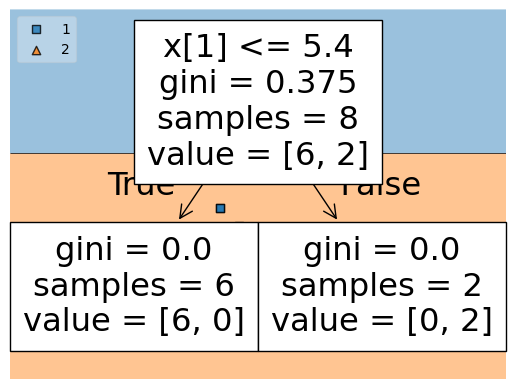

In [47]:
dt_bag1 = DecisionTreeClassifier()
evalute(dt_bag1, X,y)

In [53]:
d_bag2 = d_train.sample(8, replace=True)
X = d_bag2.iloc[:,0:2]
y = d_bag2.iloc[:,-1]

d_bag2

,sepal_width,petal_length,species
58,2.9,4.6,1
82,2.7,3.9,1
130,2.8,6.1,2
94,2.7,4.2,1
125,3.2,6.0,2
58,2.9,4.6,1
82,2.7,3.9,1
52,3.1,4.9,1


Accuracy score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


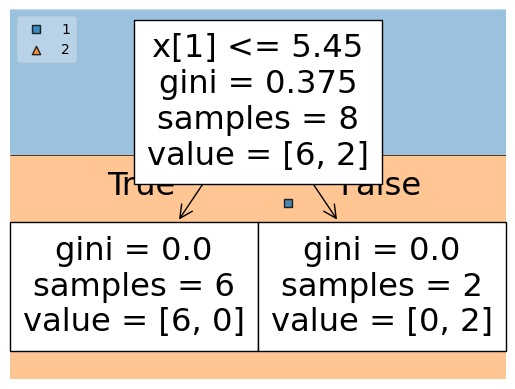

In [54]:
dt_bag2 = DecisionTreeClassifier()
evalute(dt_bag2, X,y)

In [55]:
d_bag3 = d_train.sample(8, replace=True)

X = d_bag3.iloc[:,0:2]
y = d_bag3.iloc[:,-1]

d_bag3

,sepal_width,petal_length,species
52,3.1,4.9,1
130,2.8,6.1,2
52,3.1,4.9,1
94,2.7,4.2,1
75,3.0,4.4,1
58,2.9,4.6,1
75,3.0,4.4,1
58,2.9,4.6,1


Accuracy score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


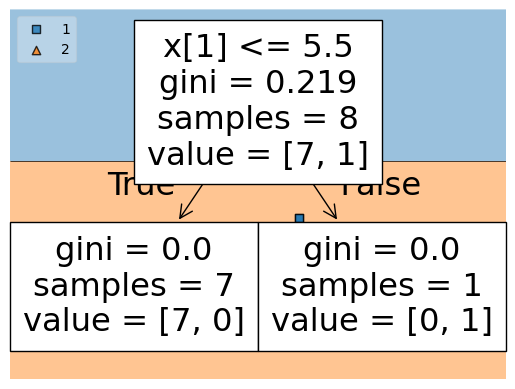

In [56]:
dt_bag3 = DecisionTreeClassifier()
evalute(dt_bag3, X,y)

In [45]:
def evalute(clf, X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))


In [61]:
d_test

,sepal_width,petal_length,species
86,3.1,4.7,1
109,3.6,6.1,2
63,2.9,4.7,1
97,2.9,4.3,1
123,2.7,4.9,2


In [66]:
print('Predictor: ', dt_bag1.predict([[3.1, 4.7]]))
print('Predictor: ', dt_bag2.predict([[3.1, 4.7]]))
print('Predictor: ', dt_bag3.predict([[3.1, 4.7]]))

Predictor:  [1]
Predictor:  [1]
Predictor:  [1]


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
